In [ ]:
import os
import glob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# --- CẤU HÌNH ---
DATASET_DIR = './Processed_Dataset'  
CLASS_NAMES = {
    0: 'Fall Detected', 
    1: 'Walking', 
    2: 'Sitting'
}

# --- TẢI DỮ LIỆU ---
def load_data_to_df(dataset_dir):
    data_records = []
    print(f"Đang đọc dữ liệu từ: {os.path.abspath(dataset_dir)}")
    
    for split in ['train', 'val']:
        lbl_dir = os.path.join(dataset_dir, 'labels', split)
        lbl_files = glob.glob(os.path.join(lbl_dir, "*.txt"))
        
        for lbl_path in lbl_files:
            if os.path.getsize(lbl_path) > 0:
                with open(lbl_path, 'r') as f:
                    for line in f:
                        parts = list(map(float, line.strip().split()))
                        if len(parts) == 5:
                            cls, x, y, w, h = parts
                            if int(cls) in CLASS_NAMES:
                                data_records.append({
                                    'split': split,
                                    'class_id': int(cls),
                                    'class_name': CLASS_NAMES[int(cls)],
                                    'x_center': x,
                                    'y_center': y,
                                    'width': w,
                                    'height': h,
                                    'area': w * h
                                })
    
    df = pd.DataFrame(data_records)
    print(f"-> Đã tải xong: {len(df)} mẫu dữ liệu.")
    return df

# Chạy hàm tải dữ liệu
df = load_data_to_df(DATASET_DIR)

Đang đọc dữ liệu từ: f:\Machine learning\Project\Processed_Dataset
-> Đã tải xong: 536 mẫu dữ liệu.


C:\Users\GIGABYTE\AppData\Local\Temp\ipykernel_26108\1557804264.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='class_name', data=df, palette='viridis', order=['Fall Detected', 'Walking', 'Sitting'])


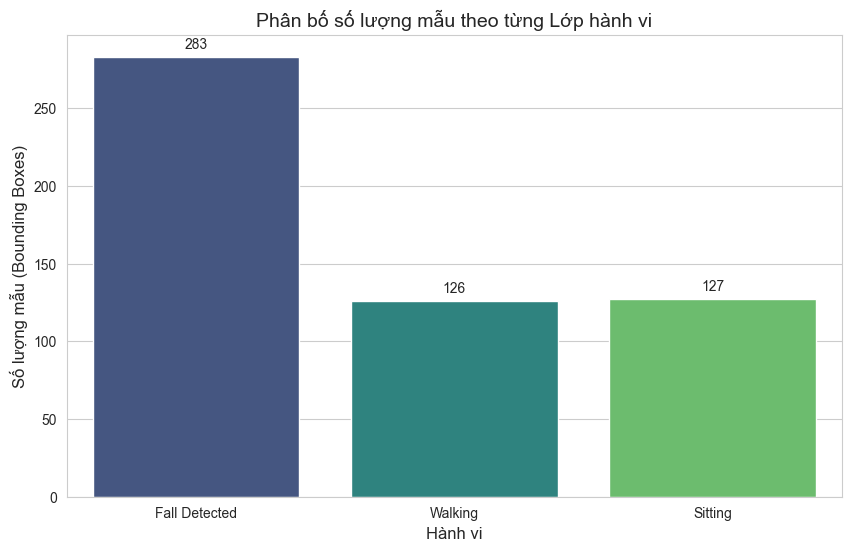

--- TỈ LỆ PHẦN TRĂM CÁC LỚP ---
class_name
Fall Detected    52.798507
Sitting          23.694030
Walking          23.507463
Name: proportion, dtype: float64


In [6]:
if not df.empty:
    plt.figure(figsize=(10, 6))
    sns.set_style("whitegrid")
    
    # Vẽ biểu đồ đếm số lượng
    ax = sns.countplot(x='class_name', data=df, palette='viridis', order=['Fall Detected', 'Walking', 'Sitting'])
    
    plt.title('Phân bố số lượng mẫu theo từng Lớp hành vi', fontsize=14)
    plt.xlabel('Hành vi', fontsize=12)
    plt.ylabel('Số lượng mẫu (Bounding Boxes)', fontsize=12)
    
    # Hiển thị con số cụ thể trên đầu cột
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha = 'center', va = 'center', 
                    xytext = (0, 9), 
                    textcoords = 'offset points')
        
    plt.show()
    
    # In tỉ lệ phần trăm
    print("--- TỈ LỆ PHẦN TRĂM CÁC LỚP ---")
    print(df['class_name'].value_counts(normalize=True) * 100)

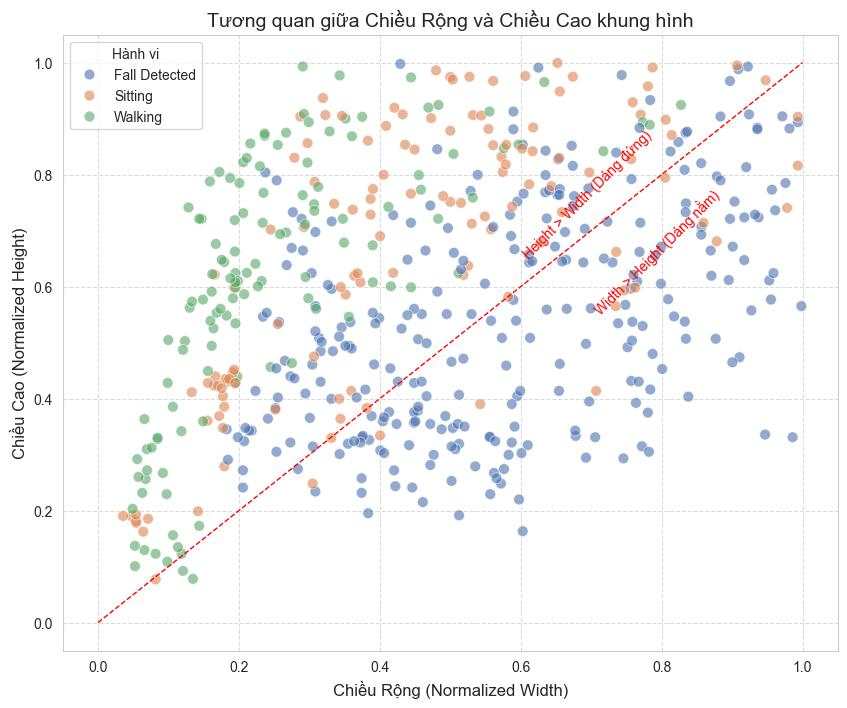

In [7]:
if not df.empty:
    plt.figure(figsize=(10, 8))
    
    # Vẽ Scatter Plot
    sns.scatterplot(x='width', y='height', hue='class_name', data=df, alpha=0.6, s=60, palette='deep')
    
    plt.title('Tương quan giữa Chiều Rộng và Chiều Cao khung hình', fontsize=14)
    plt.xlabel('Chiều Rộng (Normalized Width)', fontsize=12)
    plt.ylabel('Chiều Cao (Normalized Height)', fontsize=12)
    plt.legend(title='Hành vi')
    plt.grid(True, linestyle='--', alpha=0.7)
    
    # Vẽ đường chéo y=x để dễ so sánh (Trên đường chéo là cao > rộng, dưới là rộng > cao)
    plt.plot([0, 1], [0, 1], color='red', linestyle='--', linewidth=1)
    plt.text(0.6, 0.65, 'Height > Width (Dáng đứng)', color='red', rotation=45)
    plt.text(0.7, 0.55, 'Width > Height (Dáng nằm)', color='red', rotation=45)
    
    plt.show()

C:\Users\GIGABYTE\AppData\Local\Temp\ipykernel_26108\1026662061.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='class_name', y='area', data=df, palette='Set2', order=['Fall Detected', 'Walking', 'Sitting'])


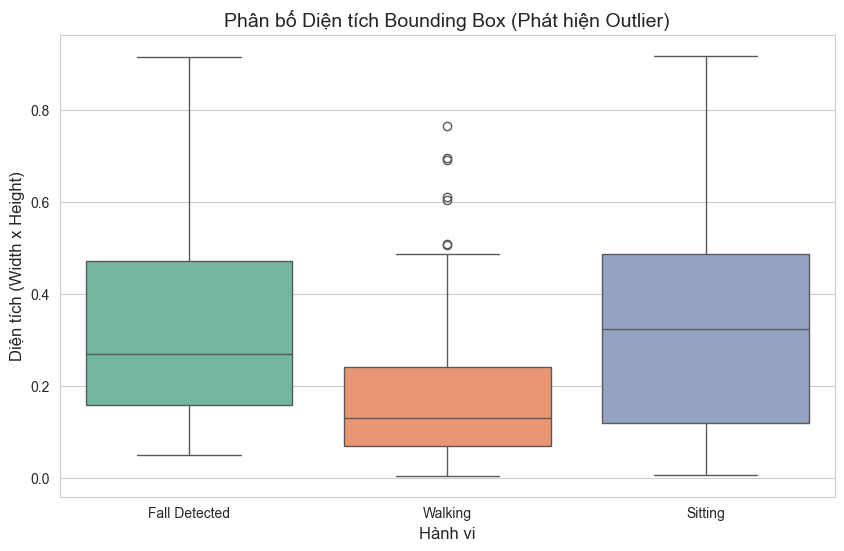

--- THỐNG KÊ MÔ TẢ DIỆN TÍCH (AREA) ---
               count      mean       std       min       25%       50%  \
class_name                                                               
Fall Detected  283.0  0.331615  0.211049  0.049595  0.159822  0.270678   
Sitting        127.0  0.334427  0.228855  0.006311  0.120388  0.324198   
Walking        126.0  0.177135  0.158209  0.005290  0.070843  0.130275   

                    75%       max  
class_name                         
Fall Detected  0.470748  0.915675  
Sitting        0.486953  0.917741  
Walking        0.241578  0.764889  


In [8]:
if not df.empty:
    plt.figure(figsize=(10, 6))
    
    # Vẽ Boxplot cho Diện tích (Area)
    sns.boxplot(x='class_name', y='area', data=df, palette='Set2', order=['Fall Detected', 'Walking', 'Sitting'])
    
    plt.title('Phân bố Diện tích Bounding Box (Phát hiện Outlier)', fontsize=14)
    plt.xlabel('Hành vi', fontsize=12)
    plt.ylabel('Diện tích (Width x Height)', fontsize=12)
    
    plt.show()
    
    # In thống kê mô tả chi tiết bằng số
    print("--- THỐNG KÊ MÔ TẢ DIỆN TÍCH (AREA) ---")
    print(df.groupby('class_name')['area'].describe())

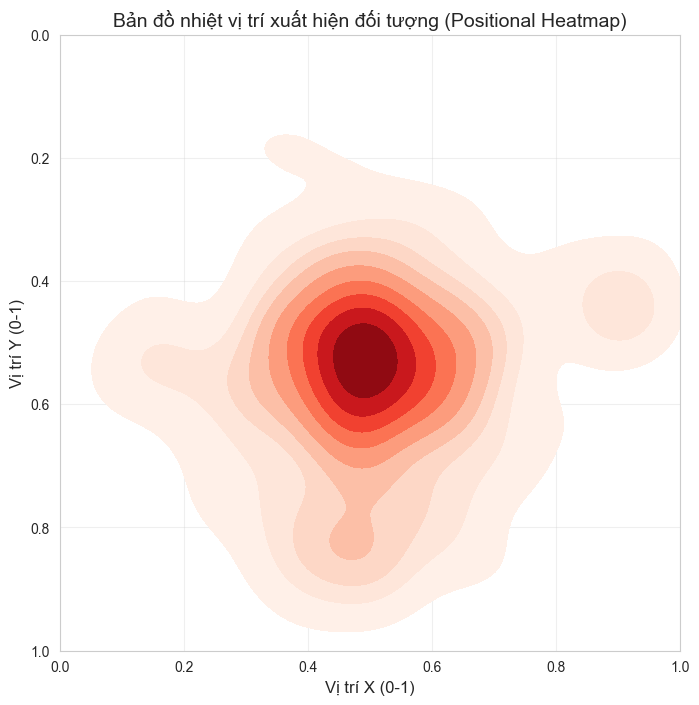

In [ ]:
if not df.empty:
    plt.figure(figsize=(8, 8))
    
    # Vẽ mật độ phân bố vị trí tâm (KDE Plot)
    sns.kdeplot(x=df['x_center'], y=df['y_center'], fill=True, cmap="Reds", thresh=0.05)
    
    plt.title('Bản đồ nhiệt vị trí xuất hiện đối tượng (Positional Heatmap)', fontsize=14)
    plt.xlabel('Vị trí X (0-1)', fontsize=12)
    plt.ylabel('Vị trí Y (0-1)', fontsize=12)
    
    # Đảo ngược trục Y để giống hệ toạ độ ảnh (gốc 0,0 ở góc trên cùng bên trái)
    plt.xlim(0, 1)
    plt.ylim(1, 0) 
    plt.grid(True, alpha=0.3)
    
    plt.show()

--- ĐANG PHÂN TÍCH CHẤT LƯỢNG ẢNH (Vui lòng đợi...) ---


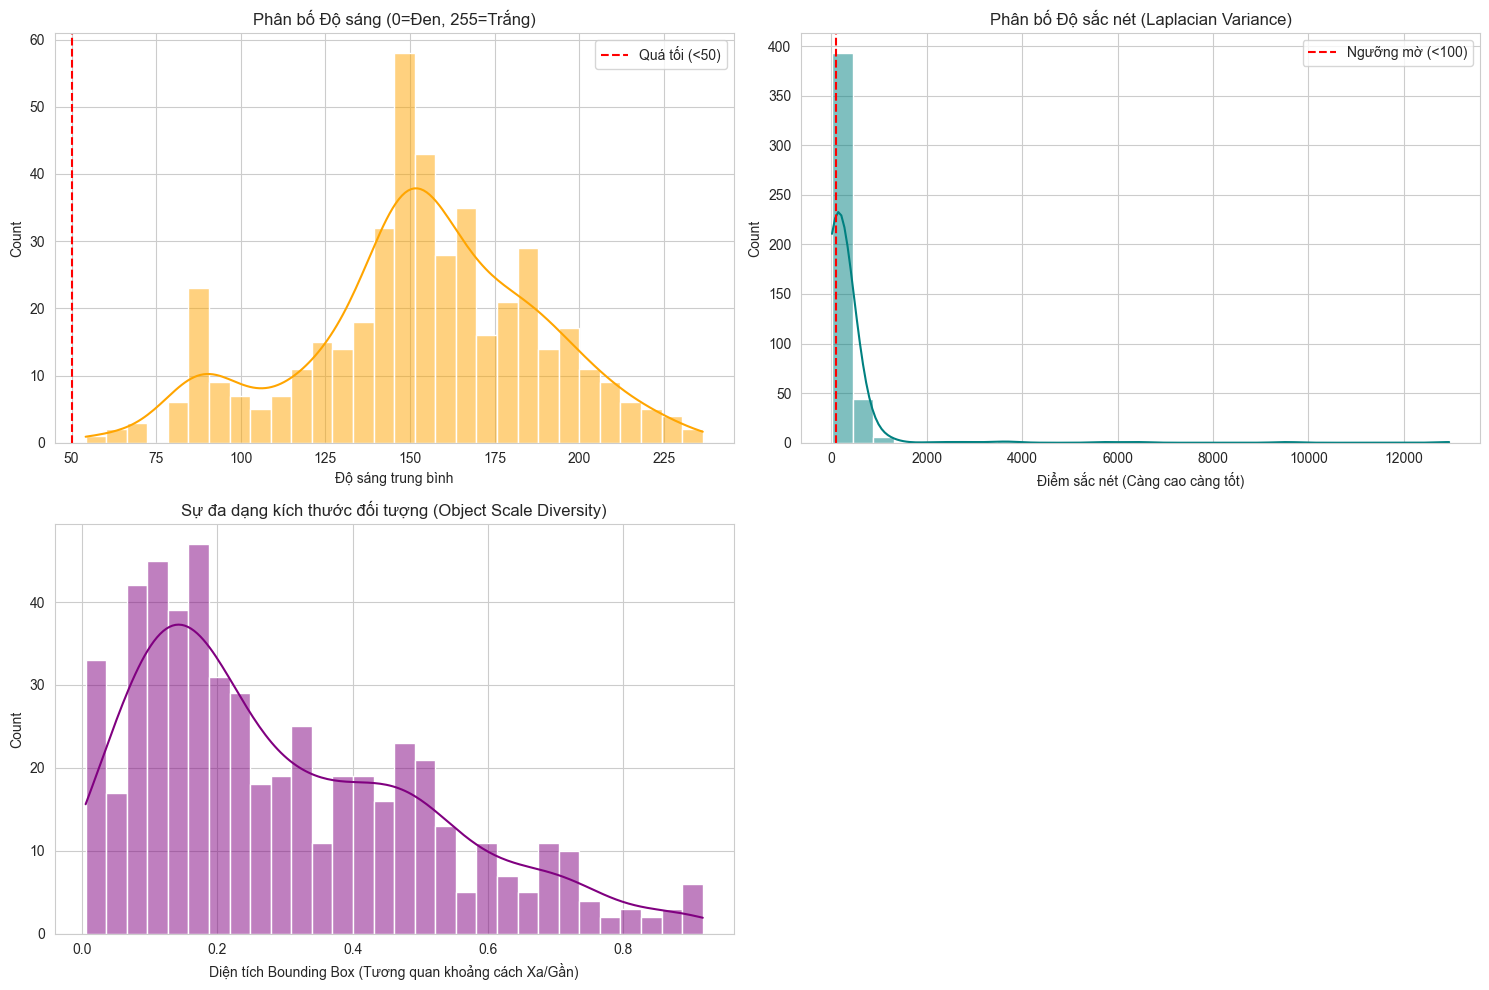


--- KẾT QUẢ THỐNG KÊ CHẤT LƯỢNG ẢNH ---
1. Độ phân giải (Resolution):
resolution
640x640    451
Name: count, dtype: int64
------------------------------
2. Độ sáng trung bình (Brightness): 153.19 (Std: 34.67)
   - Số ảnh quá tối (<50): 0
------------------------------
3. Độ sắc nét trung bình (Sharpness): 307.12
   - Số ảnh có nguy cơ bị mờ (<100): 218


In [ ]:
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import glob

# --- CẤU HÌNH ---
DATASET_DIR = './Processed_Dataset' 

def analyze_image_quality(dataset_dir):
    print("--- ĐANG PHÂN TÍCH CHẤT LƯỢNG ẢNH (Vui lòng đợi...) ---")
    
    img_stats = []
    img_paths = glob.glob(os.path.join(dataset_dir, 'images', '*', '*.jpg'))
    
    if len(img_paths) > 1000:
        print(f"Dataset lớn ({len(img_paths)} ảnh). Lấy mẫu ngẫu nhiên 1000 ảnh để phân tích...")
        img_paths = np.random.choice(img_paths, 1000, replace=False)
    
    for path in img_paths:
        img = cv2.imread(path)
        if img is None: continue
        
        h, w, _ = img.shape
        
        # 1. Tính độ sáng (Trung bình kênh Value trong HSV)
        hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
        brightness = hsv[:,:,2].mean()
        
        # 2. Tính độ sắc nét (Variance of Laplacian)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        sharpness = cv2.Laplacian(gray, cv2.CV_64F).var()
        
        img_stats.append({
            'filename': os.path.basename(path),
            'width': w,
            'height': h,
            'resolution': f"{w}x{h}",
            'brightness': brightness,
            'sharpness': sharpness
        })
        
    df_img = pd.DataFrame(img_stats)
    return df_img

# --- CHẠY PHÂN TÍCH ---
df_quality = analyze_image_quality(DATASET_DIR)

if not df_quality.empty:
    # ================= VẼ BIỂU ĐỒ =================
    plt.figure(figsize=(15, 10))
    sns.set_style("whitegrid")
    
    # 1. Biểu đồ Độ sáng (Brightness)
    plt.subplot(2, 2, 1)
    sns.histplot(df_quality['brightness'], kde=True, color='orange', bins=30)
    plt.title('Phân bố Độ sáng (0=Đen, 255=Trắng)', fontsize=12)
    plt.xlabel('Độ sáng trung bình')
    plt.axvline(x=50, color='red', linestyle='--', label='Quá tối (<50)')
    plt.legend()

    # 2. Biểu đồ Độ sắc nét (Sharpness)
    plt.subplot(2, 2, 2)
    sns.histplot(df_quality['sharpness'], kde=True, color='teal', bins=30)
    plt.title('Phân bố Độ sắc nét (Laplacian Variance)', fontsize=12)
    plt.xlabel('Điểm sắc nét (Càng cao càng tốt)')
    plt.axvline(x=100, color='red', linestyle='--', label='Ngưỡng mờ (<100)')
    plt.legend()

    # 3. Sự đa dạng kích thước đối tượng (Lấy từ df labels đã có ở bước trước)
    if 'df' in globals() and not df.empty:
        plt.subplot(2, 2, 3)
        sns.histplot(df['area'], kde=True, color='purple', bins=30)
        plt.title('Sự đa dạng kích thước đối tượng (Object Scale Diversity)', fontsize=12)
        plt.xlabel('Diện tích Bounding Box (Tương quan khoảng cách Xa/Gần)')
    else:
        plt.subplot(2, 2, 3)
        plt.text(0.5, 0.5, 'Cần chạy Code phần Labels trước\nđể xem Đa dạng đối tượng', ha='center')


    plt.tight_layout()
    plt.show()

    # ================= IN SỐ LIỆU CHO BÁO CÁO =================
    print("\n--- KẾT QUẢ THỐNG KÊ CHẤT LƯỢNG ẢNH ---")
    print(f"1. Độ phân giải (Resolution):")
    print(df_quality['resolution'].value_counts())
    print("-" * 30)
    print(f"2. Độ sáng trung bình (Brightness): {df_quality['brightness'].mean():.2f} (Std: {df_quality['brightness'].std():.2f})")
    print(f"   - Số ảnh quá tối (<50): {len(df_quality[df_quality['brightness'] < 50])}")
    print("-" * 30)
    print(f"3. Độ sắc nét trung bình (Sharpness): {df_quality['sharpness'].mean():.2f}")
    print(f"   - Số ảnh có nguy cơ bị mờ (<100): {len(df_quality[df_quality['sharpness'] < 100])}")